# Problem Set 8
## Juan Roa A11541981

### 1st block (imports)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

### 2nd block (function)

In [84]:
def titanic(X, y, plot):
  # splits data into training and test
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

  # creates decision tree binary classification
  tree_model = tree.DecisionTreeClassifier(max_depth=3)
  tree_model.fit(X_train[:,np.newaxis], y_train)

  # determines accuracy with true/false positive rates
  accuracy = tree_model.score(X_test[:,np.newaxis], y_test)
  y_predicted = tree_model.predict_proba(X_test[:,np.newaxis])[:,1]
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predicted)

  accuracy_train = tree_model.score(X_train[:,np.newaxis], y_train)
  
  # tests validation scores to see if model is overfit
  if abs(accuracy_train - accuracy) >= 0.10:
    print('The model is overfit')

  # creates graphs if plot == True
  if plot == True:
    fig, axes = plt.subplots(2,1, figsize=[10,15])

    # Boxplot
    sns.boxplot(ax=axes[0], x=y, y=X)
    axes[0].set_title('Suvival Box Plot', fontsize=18)

    # ROC
    axes[1].plot(fpr, tpr)
    axes[1].plot([0,1], [0,1])
    axes[1].set_title('ROC Curve', fontsize=18)
    axes[1].set_xlabel('False Positive Rate', fontsize=14)
    axes[1].set_ylabel('True Positive Rate', fontsize=14)

### 3rd block (load data)

In [ ]:
# loads data
titanic_df = sns.load_dataset('titanic')
titanic_df.dropna(inplace=True)

### 4th block (creating features)

In [ ]:
# features testing
Fare = titanic_df['fare']
Pclass = titanic_df['pclass']

# dependent variable
Survive = titanic_df['survived']

### 5th block (running function & answering)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, No

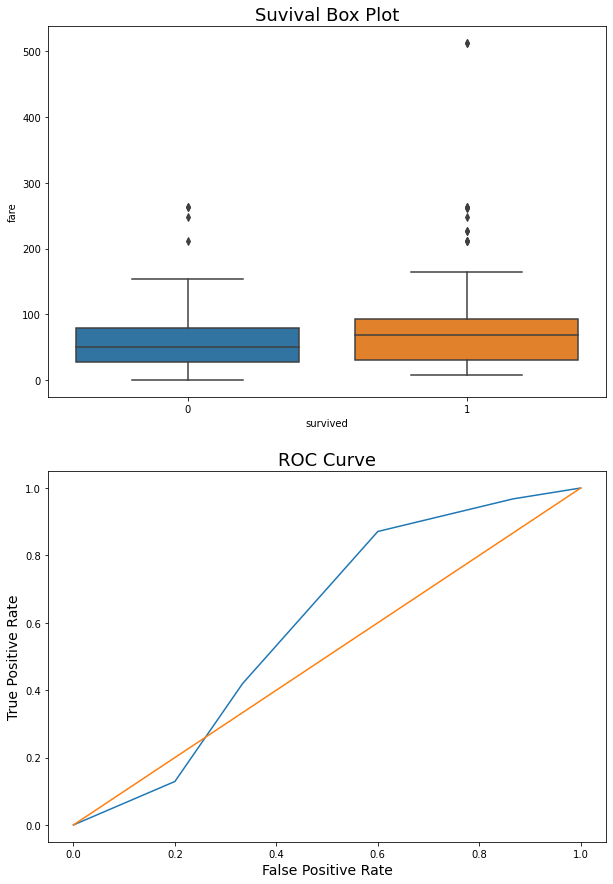

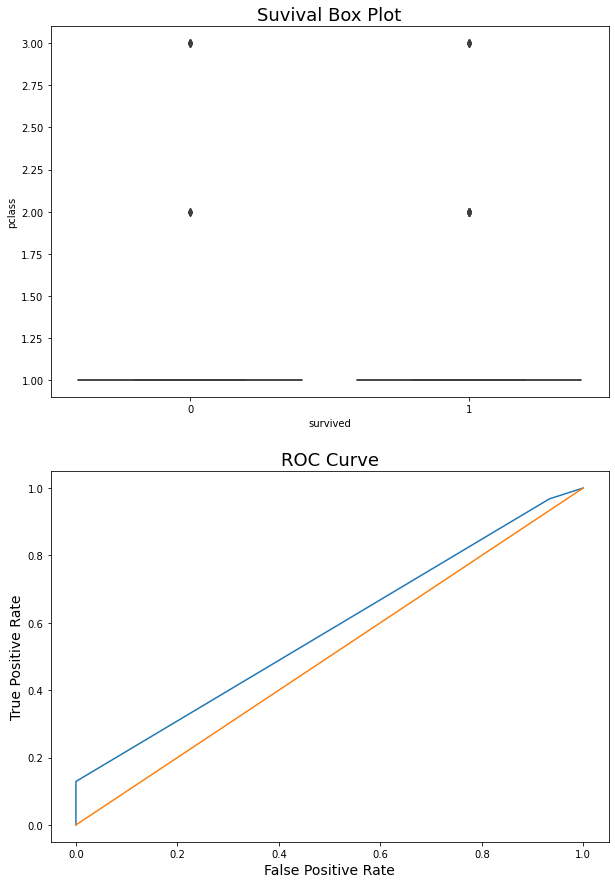

In [85]:
titanic(Fare, Survive, True)
titanic(Pclass, Survive, True)

According to the function, the better predictor of survival is fare. In comparison to Pclass, Fare has a greater true positive rate so it would be more important to focus on spending more on the ticket fare than being in a better class.